In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv', dtype='unicode') # Read the train data into a pandas dataframe
df['CentralAir'] = df['CentralAir'].replace(['Y'],1) # Change Y and N to 1 and 0
df['CentralAir'] = df['CentralAir'].replace(['N'],0)
df['PavedDrive'] = df['PavedDrive'].replace(['Y'],1) # Change Y to 1 and N and P to 0
df['PavedDrive'] = df['PavedDrive'].replace(['N'],0)
df['PavedDrive'] = df['PavedDrive'].replace(['P'],0)
df[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtHalfBath', \
    'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch', \
    '3SsnPorch','ScreenPorch','PoolArea','MiscVal','OverallQual','OverallCond','SalePrice']] \
= df[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtHalfBath', \
    'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch', \
    '3SsnPorch','ScreenPorch','PoolArea','MiscVal','OverallQual','OverallCond','SalePrice']].astype(float) # Convert numerical variables to float
df.rename(columns={'1stFlrSF': 'IstFlrSF', '2ndFlrSF': 'IIndFlrSF', '3SsnPorch': 'IIISsnPorch'}, inplace=True) # Rename columns so they don't start with a number
df['MasVnrType'] = df['MasVnrType'].fillna('None') # Change NaN values to None
df['MasVnrArea'] = df['MasVnrArea'].fillna(0) # Change NaN values to 0
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean()) # Change NaN values to mean of the column

In [4]:
df.describe() # display basic statistics about the numerical colummns

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,...,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,IIISsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,1057.429452,0.934932,...,472.980137,0.917808,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,22.024023,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,438.705324,0.246731,...,213.804841,0.274751,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,1.000000,...,334.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,70.049958,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1.000000,...,480.000000,1.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1.000000,...,576.000000,1.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,1.000000,...,1418.000000,1.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


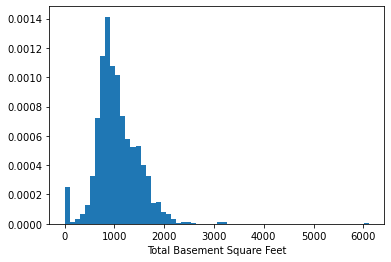

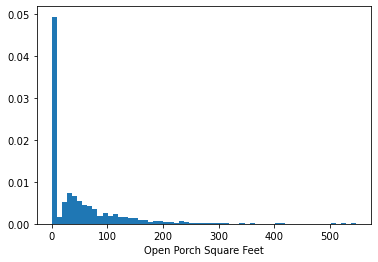

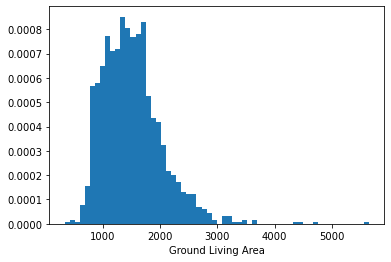

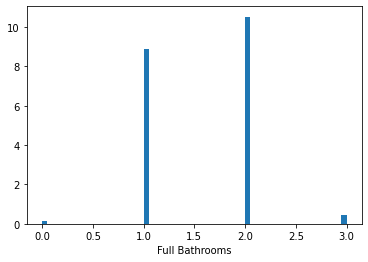

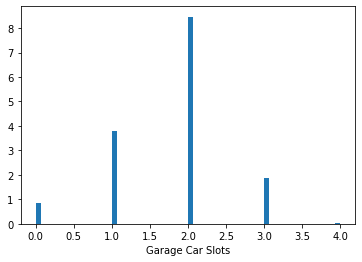

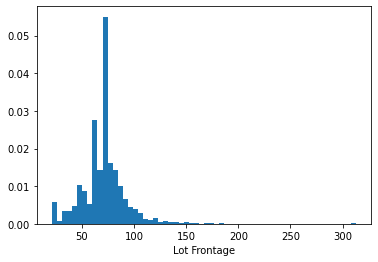

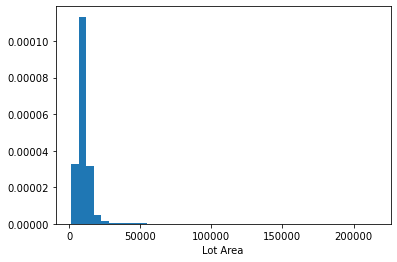

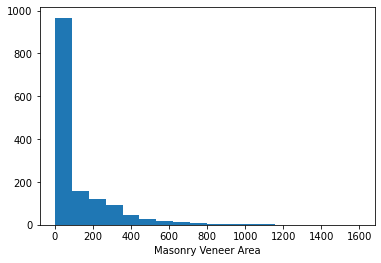

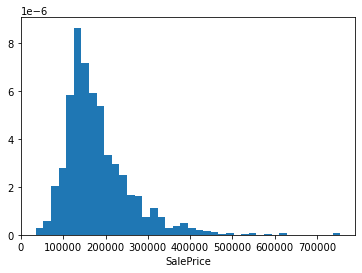

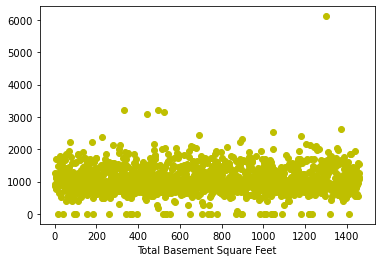

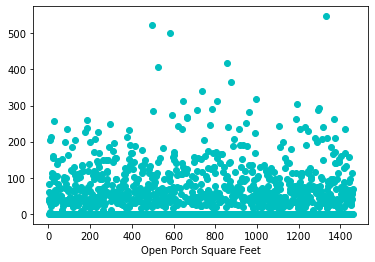

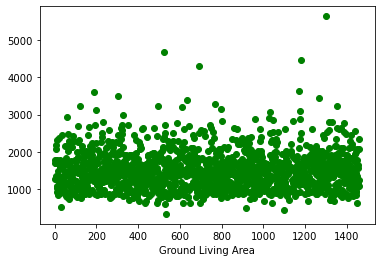

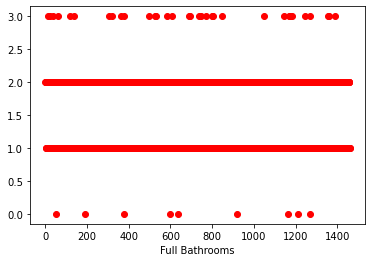

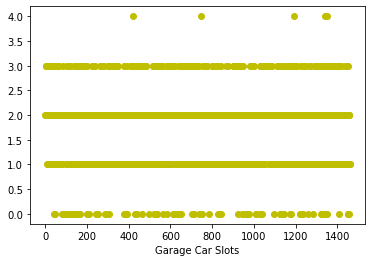

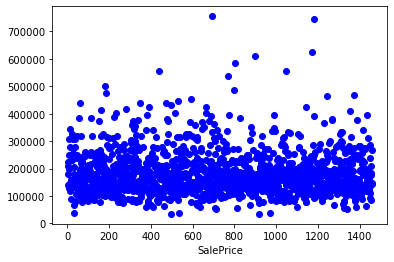

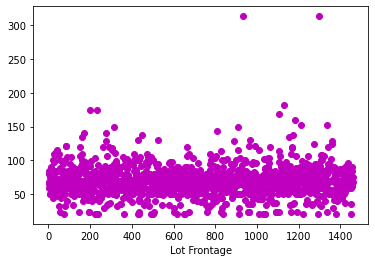

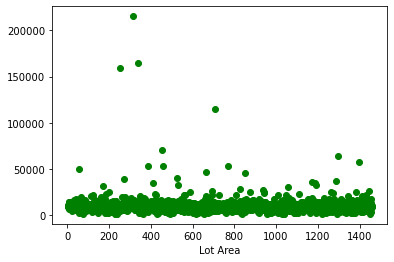

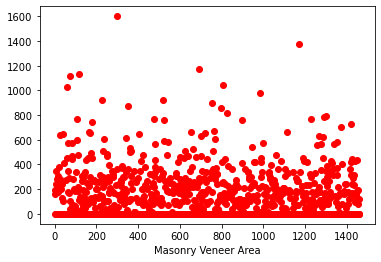

In [5]:
# Series of histograms
plt.hist(df['TotalBsmtSF'], bins=60, density=True)
plt.xlabel('Total Basement Square Feet')
plt.show();

plt.hist(df['OpenPorchSF'], bins=60, density=True)
plt.xlabel('Open Porch Square Feet')
plt.show();

plt.hist(df['GrLivArea'], bins=60, density=True)
plt.xlabel('Ground Living Area')
plt.show();

plt.hist(df['FullBath'], bins=60, density=True)
plt.xlabel('Full Bathrooms')
plt.show();

plt.hist(df['GarageCars'], bins=60, density=True)
plt.xlabel('Garage Car Slots')
plt.show();

plt.hist(df['LotFrontage'], bins=60, density=True)
plt.xlabel('Lot Frontage')
plt.show();

plt.hist(df['LotArea'], bins=40, density=True)
plt.xlabel('Lot Area')
plt.show();

plt.hist(df['MasVnrArea'], bins=18)
plt.xlabel('Masonry Veneer Area')
plt.show();

plt.hist(df['SalePrice'], bins=40, density=True)
plt.xlabel('SalePrice')
plt.show();

# Series of scatter plots
plt.plot(np.arange(1,1461), df['TotalBsmtSF'], 'yo')
plt.xlabel('Total Basement Square Feet')
plt.show();

plt.plot(np.arange(1,1461), df['OpenPorchSF'], 'co')
plt.xlabel('Open Porch Square Feet')
plt.show();

plt.plot(np.arange(1,1461), df['GrLivArea'], 'go')
plt.xlabel('Ground Living Area')
plt.show();

plt.plot(np.arange(1,1461), df['FullBath'], 'ro')
plt.xlabel('Full Bathrooms')
plt.show();

plt.plot(np.arange(1,1461), df['GarageCars'], 'yo')
plt.xlabel('Garage Car Slots')
plt.show();

plt.plot(np.arange(1,1461), df['SalePrice'], 'bo')
plt.xlabel('SalePrice')
plt.show();

plt.plot(np.arange(1,1461), df['LotFrontage'], 'mo')
plt.xlabel('Lot Frontage')
plt.show();

plt.plot(np.arange(1,1461), df['LotArea'], 'go')
plt.xlabel('Lot Area')
plt.show();

plt.plot(np.arange(1,1461), df['MasVnrArea'], 'ro')
plt.xlabel('Masonry Veneer Area')
plt.show();


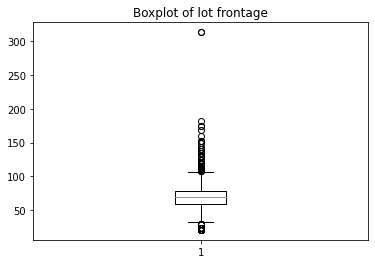

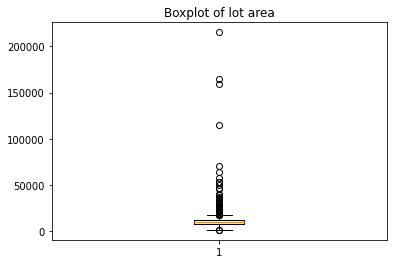

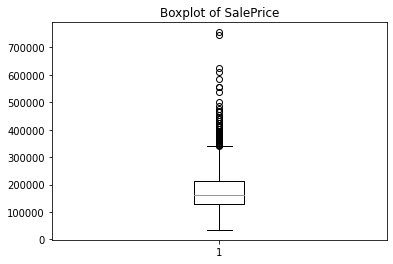

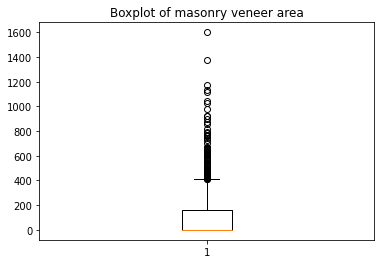

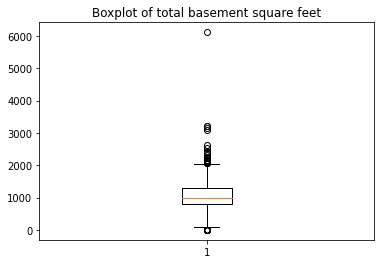

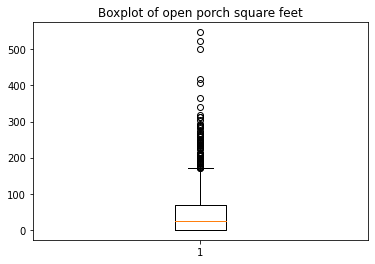

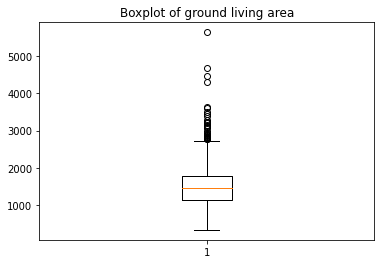

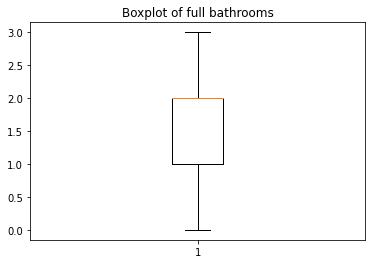

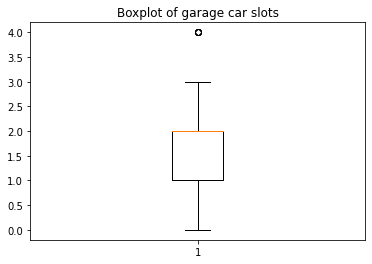

In [23]:
# Series of boxplots
plt.title('Boxplot of lot frontage')
plt.boxplot(df['LotFrontage'])
plt.show();

plt.title('Boxplot of lot area')
plt.boxplot(df['LotArea'])
plt.show();

plt.title('Boxplot of SalePrice')
plt.boxplot(df['SalePrice'])
plt.show();

plt.title('Boxplot of masonry veneer area')
plt.boxplot(df['MasVnrArea'])
plt.show();

plt.title('Boxplot of total basement square feet')
plt.boxplot(df['TotalBsmtSF'])
plt.show();

plt.title('Boxplot of open porch square feet')
plt.boxplot(df['OpenPorchSF'])
plt.show();

plt.title('Boxplot of ground living area')
plt.boxplot(df['GrLivArea'])
plt.show();

plt.title('Boxplot of full bathrooms')
plt.boxplot(df['FullBath'])
plt.show();

plt.title('Boxplot of garage car slots')
plt.boxplot(df['GarageCars'])
plt.show();

In [6]:
# Display correlation of numerical variables against each other
with pd.option_context('display.max_columns', None): # This line is used to display all the output instead of truncating it
    print (df.corr())

               LotFrontage   LotArea  OverallQual  MasVnrArea  BsmtFinSF1  \
LotFrontage       1.000000  0.306795     0.234196    0.178699    0.215828   
LotArea           0.306795  1.000000     0.105806    0.103321    0.214103   
OverallQual       0.234196  0.105806     1.000000    0.407252    0.239666   
MasVnrArea        0.178699  0.103321     0.407252    1.000000    0.261256   
BsmtFinSF1        0.215828  0.214103     0.239666    0.261256    1.000000   
BsmtFinSF2        0.043340  0.111170    -0.059119   -0.071330   -0.050117   
BsmtUnfSF         0.122156 -0.002618     0.308159    0.113862   -0.495251   
TotalBsmtSF       0.363358  0.260833     0.537808    0.360067    0.522396   
CentralAir        0.068666  0.049755     0.272038    0.126409    0.166468   
IstFlrSF          0.414266  0.299475     0.476224    0.339850    0.445863   
IIndFlrSF         0.072483  0.050986     0.295493    0.173800   -0.137079   
LowQualFinSF      0.036849  0.004779    -0.030429   -0.068628   -0.064503   

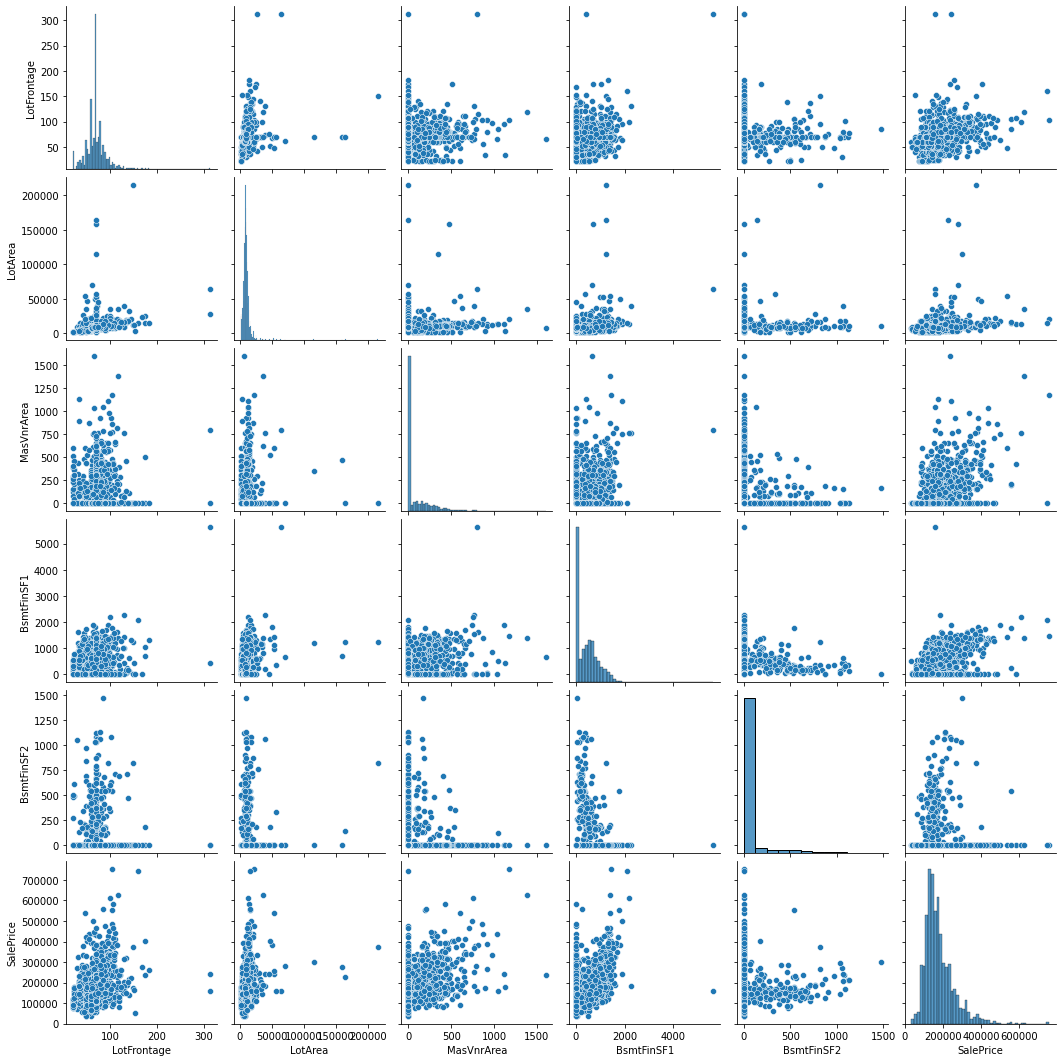

In [56]:
# Series of plots pairing each variable against another
sns.pairplot(df[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','SalePrice']]);

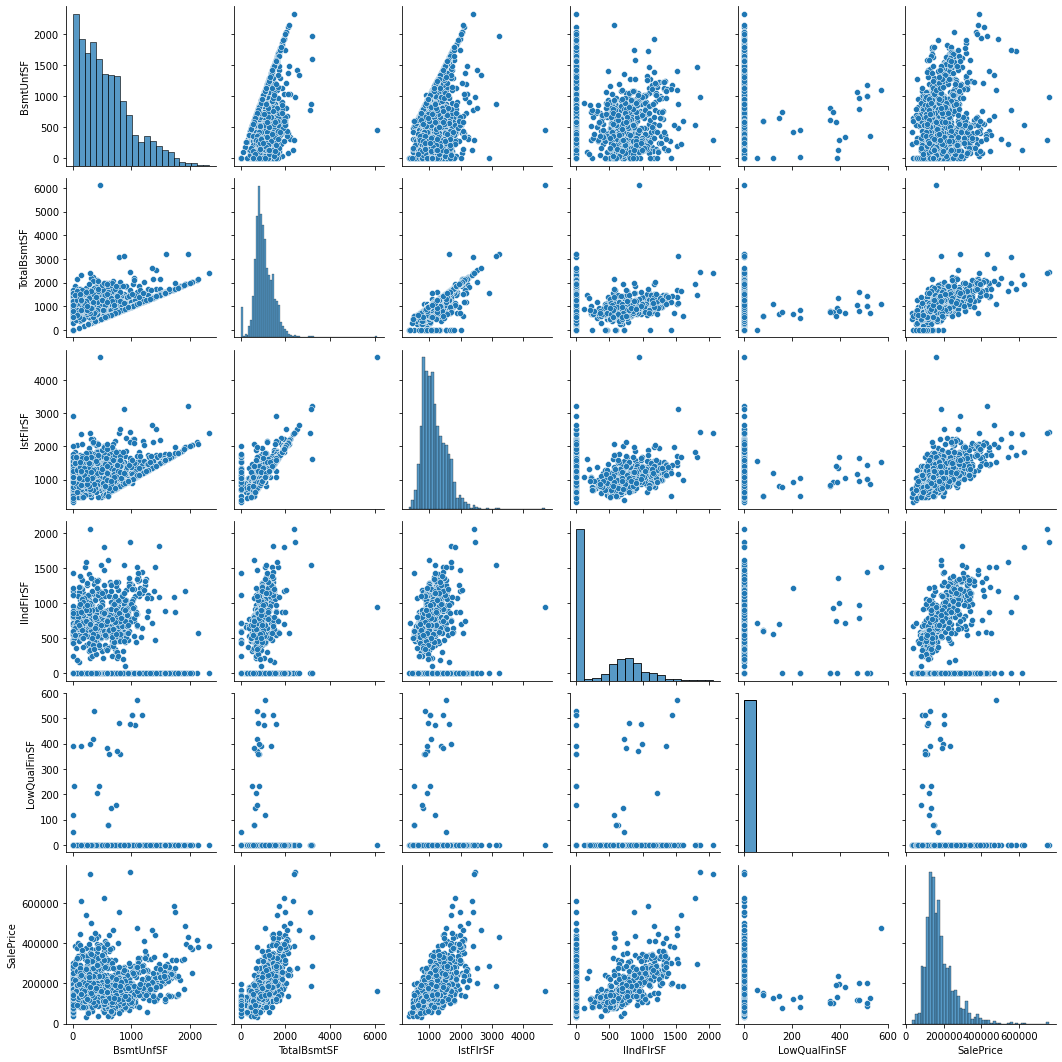

In [8]:
# Series of plots pairing each variable against another
sns.pairplot(df[['BsmtUnfSF','TotalBsmtSF','IstFlrSF','IIndFlrSF','LowQualFinSF','SalePrice']]);

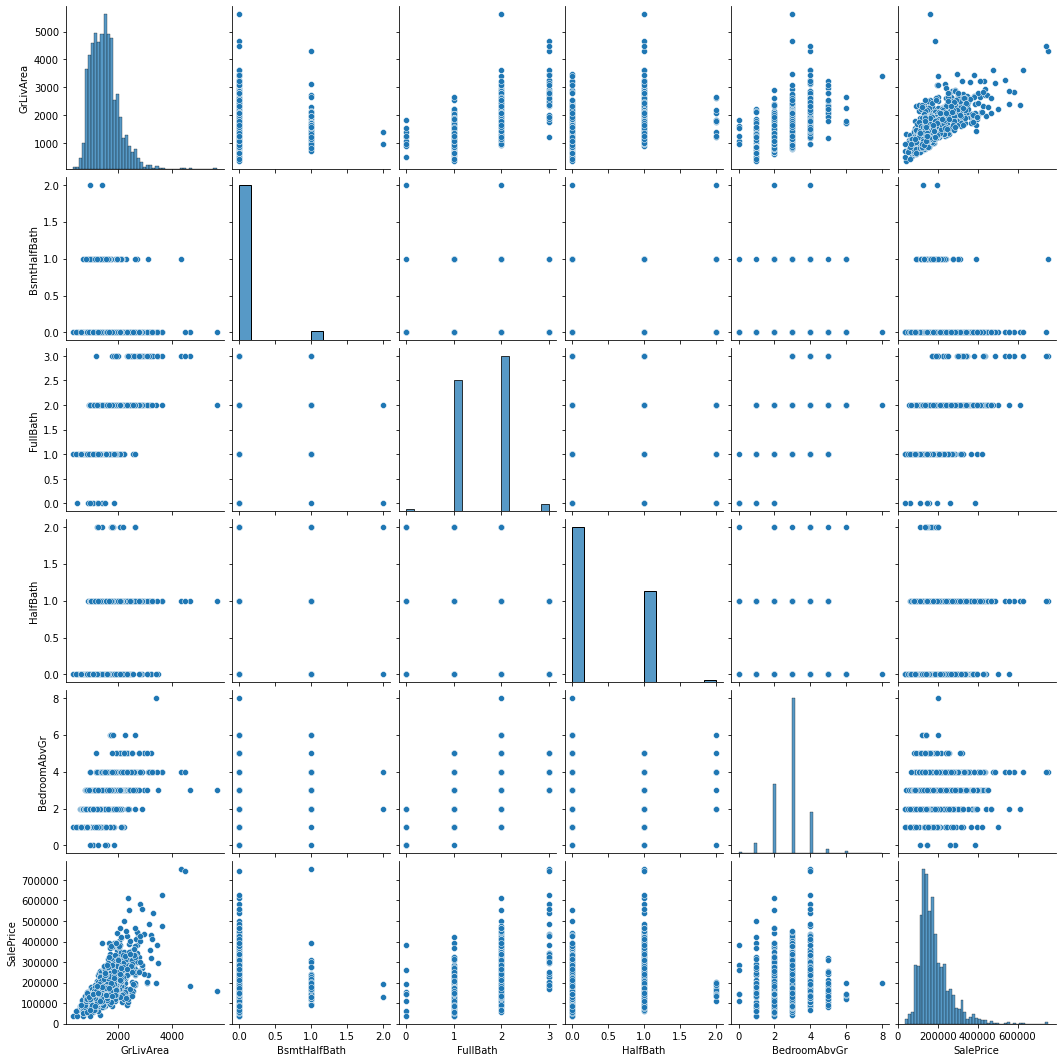

In [9]:
# Series of plots pairing each variable against another
sns.pairplot(df[['GrLivArea','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','SalePrice']]);

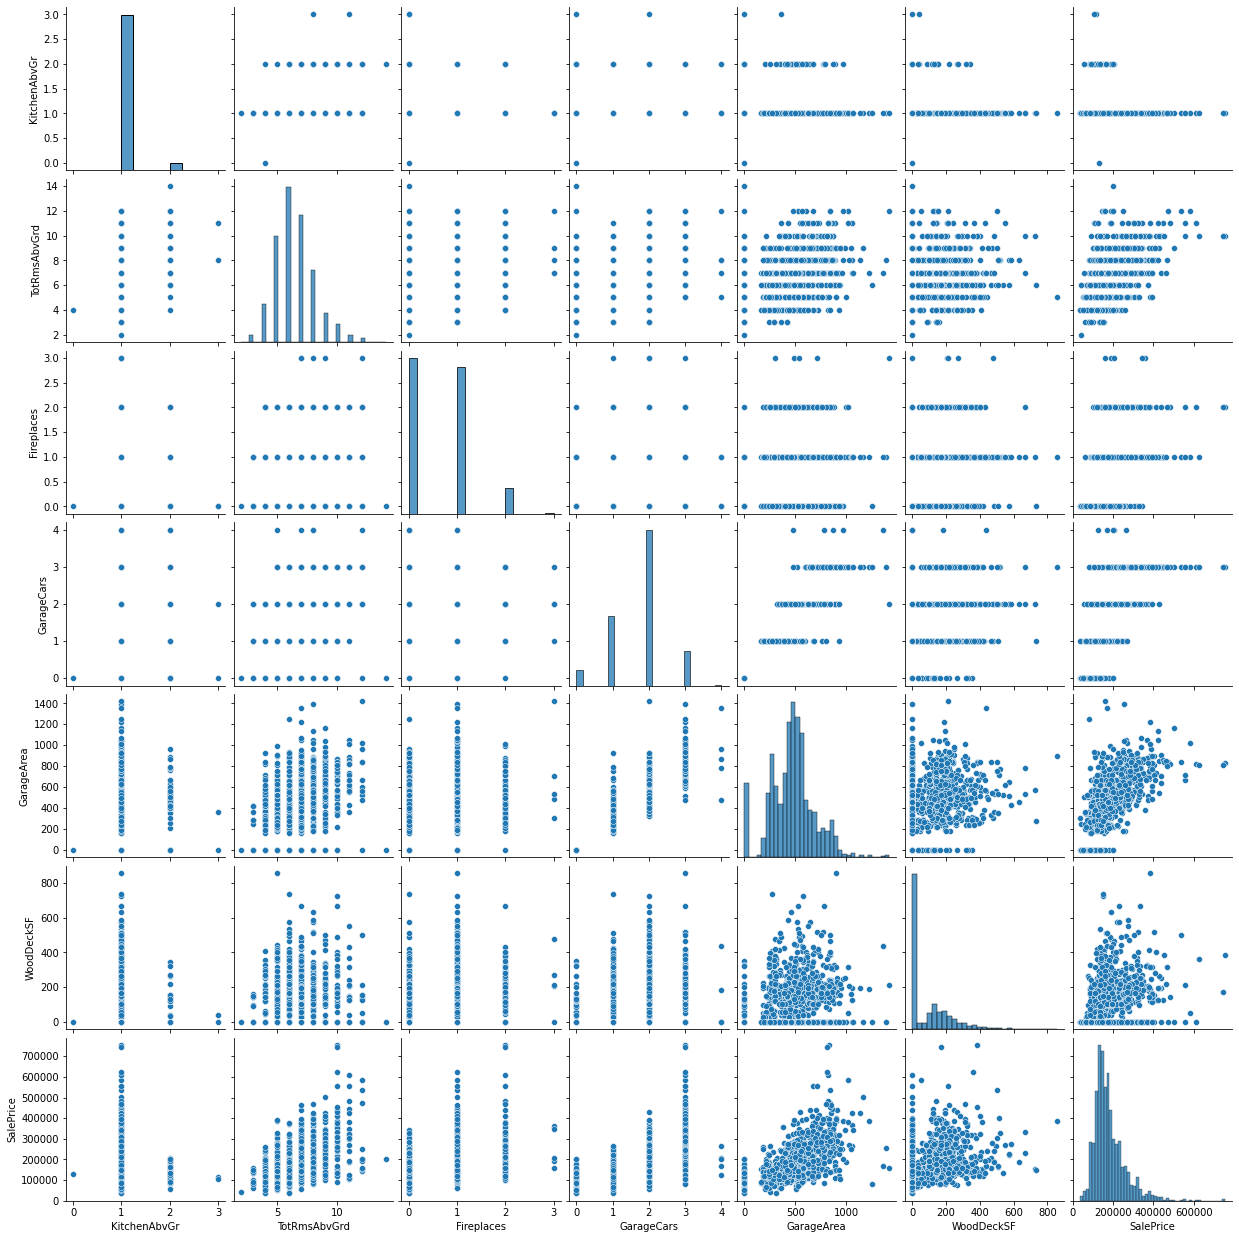

In [10]:
# Series of plots pairing each variable against another
sns.pairplot(df[['KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','SalePrice']]);

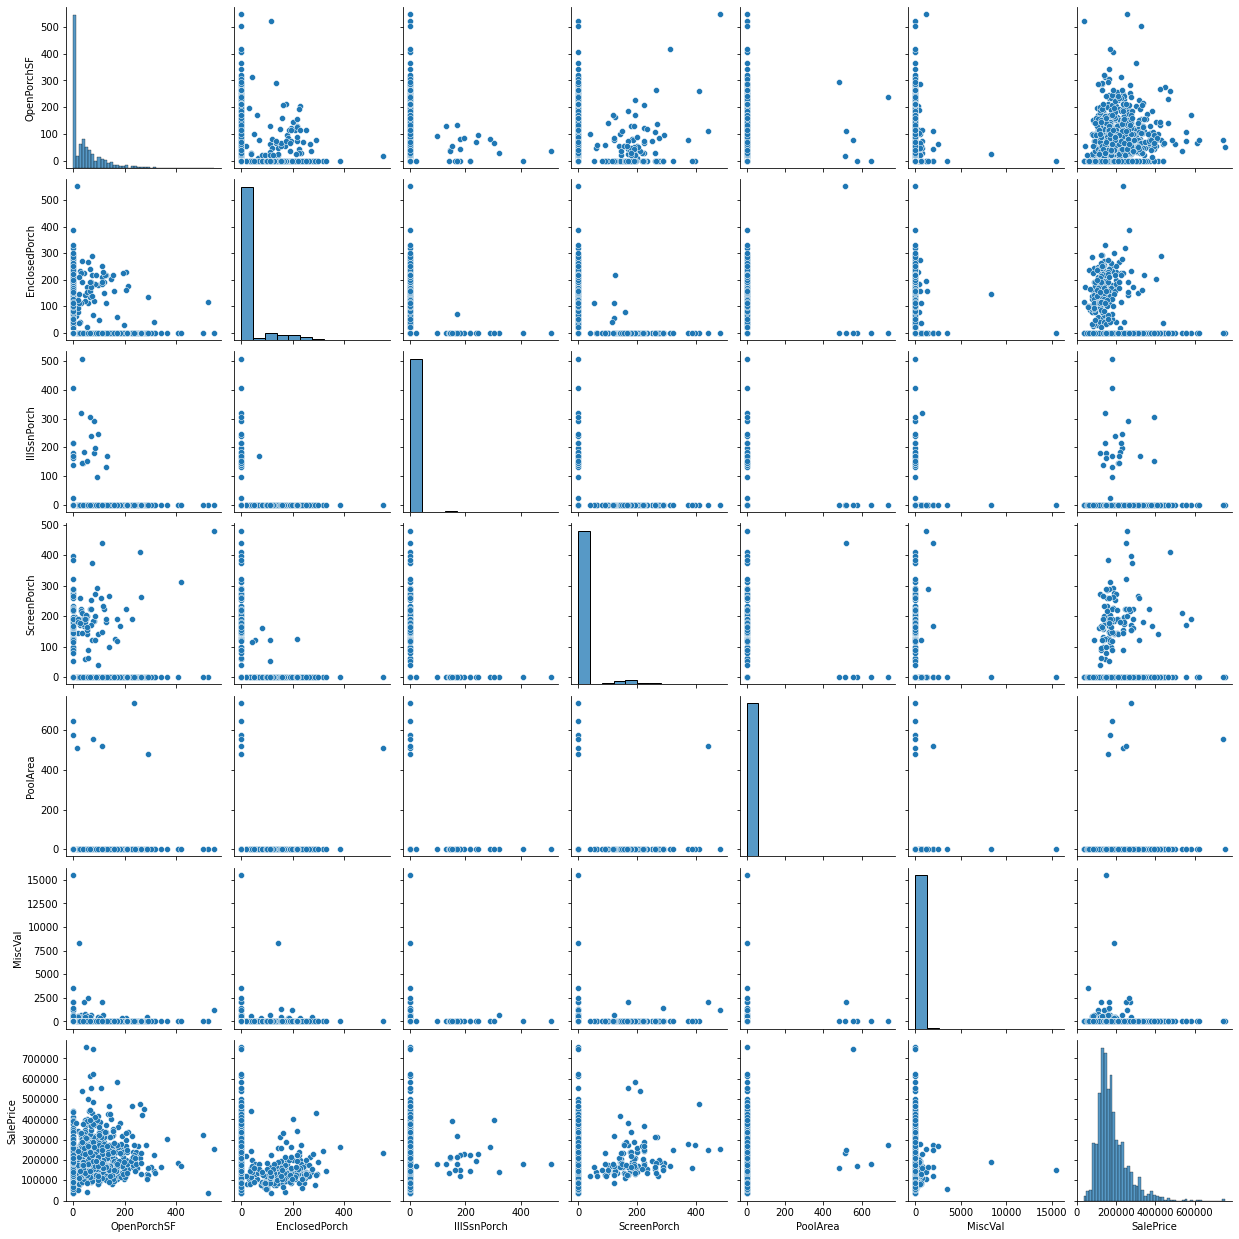

In [11]:
# Series of plots pairing each variable against another
sns.pairplot(df[['OpenPorchSF','EnclosedPorch','IIISsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']]);

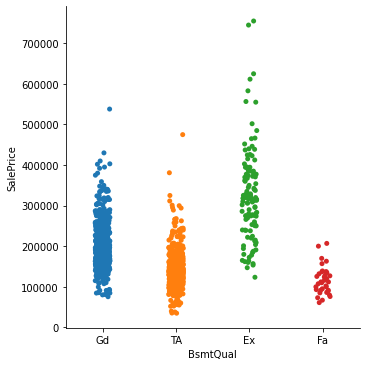

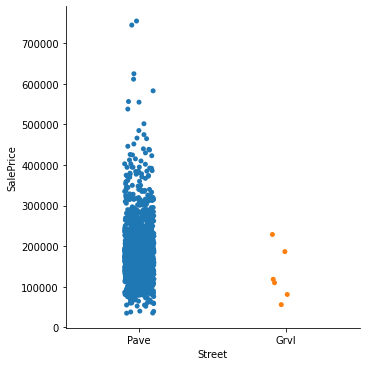

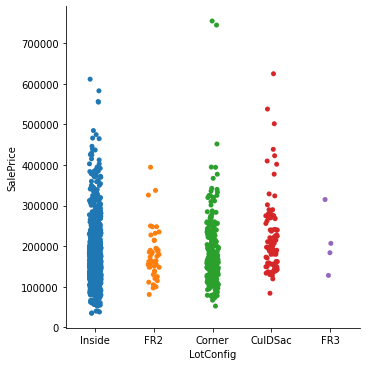

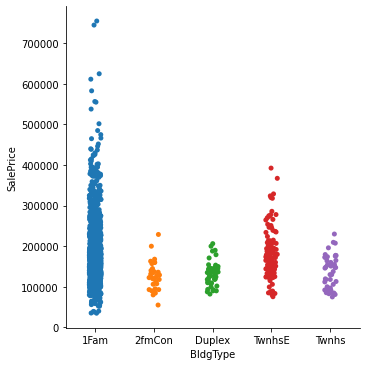

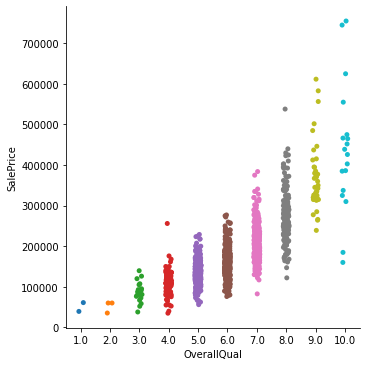

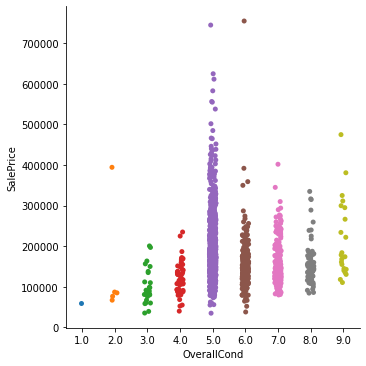

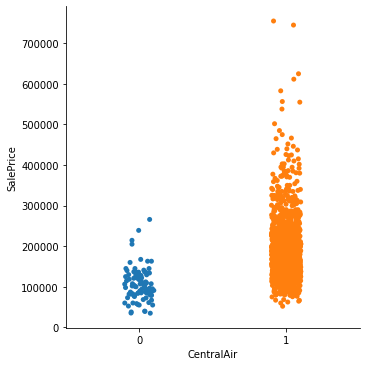

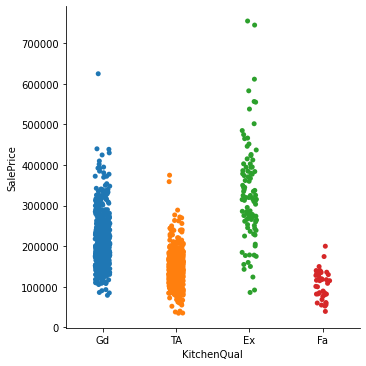

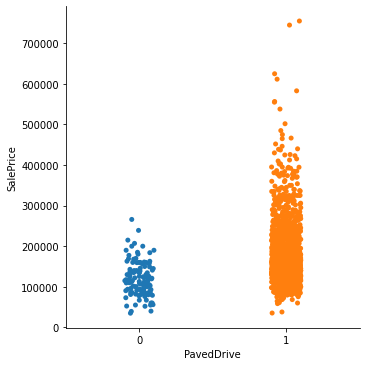

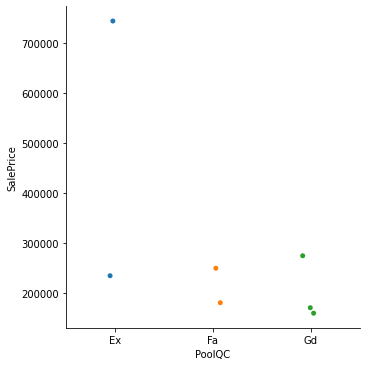

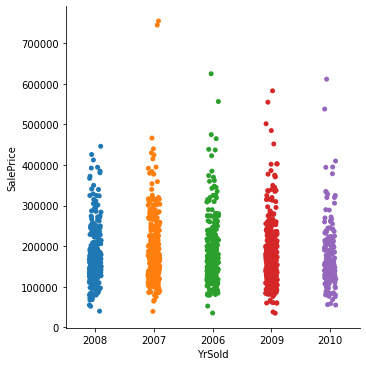

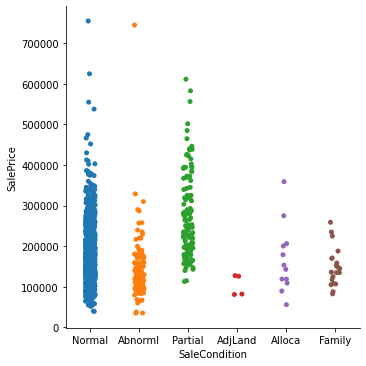

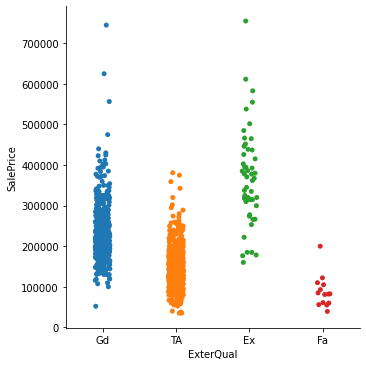

In [25]:
# Series of plots pairing categorical variables against SalePrice
sns.catplot(x="BsmtQual", y="SalePrice", data=df);
sns.catplot(x="Street", y="SalePrice", data=df);
sns.catplot(x="LotConfig", y="SalePrice", data=df);
sns.catplot(x="BldgType", y="SalePrice", data=df);
sns.catplot(x="OverallQual", y="SalePrice", data=df);
sns.catplot(x="OverallCond", y="SalePrice", data=df);
sns.catplot(x="CentralAir", y="SalePrice", data=df);
sns.catplot(x="KitchenQual", y="SalePrice", data=df);
sns.catplot(x="PavedDrive", y="SalePrice", data=df);
sns.catplot(x="PoolQC", y="SalePrice", data=df);
sns.catplot(x="YrSold", y="SalePrice", data=df);
sns.catplot(x="SaleCondition", y="SalePrice", data=df);
sns.catplot(x="ExterQual", y="SalePrice", data=df);

In [6]:
# End result of naive model, started with all numerical variables all elminiated variables
# with high p-values (>0.05) or with zero in the confidence interval

# Remove outliers in row 523 and 1298
df.drop(1298, inplace=True)
df.drop(523, inplace=True)

mod = smf.ols('SalePrice ~ MasVnrArea + BsmtFinSF1 + TotalBsmtSF + LowQualFinSF + \
FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + (TotRmsAbvGrd*GrLivArea) + GarageCars' \
    , data=df) # R = 0.818, No high p-values

res=mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     541.7
Date:                Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:45:41   Log-Likelihood:                -17277.
No. Observations:                1458   AIC:                         3.458e+04
Df Residuals:                    1445   BIC:                         3.465e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               9.904e+04   1.05e+04      9.465      0.000    7.85e+04     1.2e+05
MasVnrArea                33.6935      5.668      5.944      0.000      22.574      44.813
BsmtFinSF1                23.7959      2.404      9.900      0.000      19.081      28.511
TotalBsmtSF               48.1897      2.963     16.265      0.000      42.378      54.002
LowQualFinSF             -98.9127     19.426     -5.092      0.000    -137.020     -60.806
FullBath                1.832e+04   2277.678      8.043      0.000    1.39e+04    2.28e+04
HalfBath                8476.6190   2173.303      3.900      0.000    4213.453    1.27e+04
BedroomAbvGr           -1.703e+04   1559.250    -10.925      0.000   -2.01e+04    -1.4e+04
KitchenAbvGr           -5.428e+04   4374.252    -12.408      0.000   -6.29e+04   -4.57e+04
TotRmsAbvGrd           -5642.2204   1807.640     -3.121      0.002   -9188.100   -2096.341
GrLivArea                 15.0287      7.824      1.921      0.055      -0.319      30.376
TotRmsAbvGrd:GrLivArea     6.9932      0.841      8.311      0.000       5.343       8.644
GarageCars              1.819e+04   1556.278     11.686      0.000    1.51e+04    2.12e+04
==============================================================================
Omnibus:                      131.557   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              646.759
Skew:                           0.262   Prob(JB):                    3.61e-141
Kurtosis:                       6.221   Cond. No.                     1.48e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

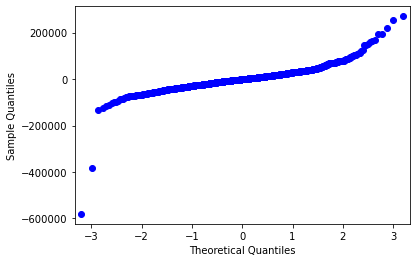

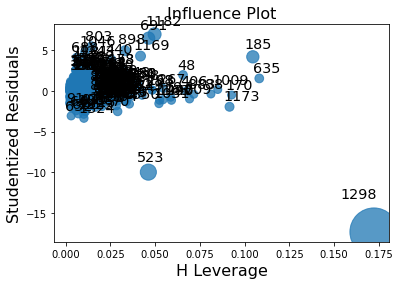

In [8]:
# Plot residuals of the regression model in the previous section
# line is diagonal and linear if the regression model is a good fit
import seaborn as sns
import statsmodels
import statsmodels.api as sm
sm.qqplot(res.resid);
plt.show();

# Leverage plot is good for identifying outliers
sm.graphics.influence_plot(res)
plt.show();

In [7]:
# Group the dataset into pandas dataforms by OverQual score
df1 = df.loc[df['OverallQual'] <= 3]
list45678 = [4,5,6,7,8]
df4 = df.loc[df['OverallQual'].isin(list45678)]
list910 = [9,10]
df9 = df.loc[df['OverallQual'].isin(list910)]

# A series of regression models to be applied based on the OverallQual score
mod1 = smf.ols('SalePrice ~ LotFrontage + BsmtFinSF1 + BsmtUnfSF + LowQualFinSF + \
GrLivArea + BedroomAbvGr + KitchenAbvGr + TotRmsAbvGrd + GarageCars + GarageArea + \
OpenPorchSF + IIndFlrSF' \
    , data=df1) # R = 0.951, No high p-values
mod4 = smf.ols('SalePrice ~ LotFrontage + LotArea + MasVnrArea + (BsmtFinSF1*TotalBsmtSF) + LowQualFinSF + \
GrLivArea + FullBath + (GarageCars*GarageArea) + WoodDeckSF + OpenPorchSF + IstFlrSF + IIndFlrSF + CentralAir' \
    , data=df4) # R = 0.767, no high p-values
mod9 = smf.ols('SalePrice ~ LotFrontage + LotArea + BsmtFinSF1 + BsmtUnfSF + \
BsmtHalfBath + FullBath + HalfBath + TotRmsAbvGrd + ScreenPorch + PoolArea' \
    , data=df9) # R = 0.916, No high p-values

res1=mod1.fit()
res4=mod4.fit()
res9=mod9.fit()
# Overallqual = 1,2,3
print('OverallQual = 1,2,3')
res1.summary()

OverallQual = 1,2,3


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     19.44
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           5.12e-06
Time:                        21:45:55   Log-Likelihood:                -252.35
No. Observations:                  25   AIC:                             530.7
Df Residuals:                      12   BIC:                             546.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.709e+04   1.02e+04      3.621      0.004    1.48e+04    5.94e+04
LotFrontage   -896.2440    182.143     -4.921      0.000   -1293.100    -499.388
BsmtFinSF1      40.5099     14.614      2.772      0.017       8.669      72.351
BsmtUnfSF      -26.7134      6.824     -3.915      0.002     -41.581     -11.846
LowQualFinSF    88.5017     28.264      3.131      0.009      26.919     150.084
GrLivArea       75.3153     14.560      5.173      0.000      43.592     107.038
BedroomAbvGr  1.693e+04   5164.032      3.278      0.007    5677.271    2.82e+04
KitchenAbvGr  2.672e+04   8919.224      2.996      0.011    7286.163    4.62e+04
TotRmsAbvGrd -8638.4750   3872.718     -2.231      0.046   -1.71e+04    -200.548
GarageCars   -3.173e+04   9918.392     -3.199      0.008   -5.33e+04   -1.01e+04
GarageArea     153.1758     33.945      4.512      0.001      79.215     227.136
OpenPorchSF    236.8250     49.745      4.761      0.000     128.440     345.210
IIndFlrSF      -53.3987     12.175     -4.386      0.001     -79.926     -26.871
==============================================================================
Omnibus:                        3.525   Durbin-Watson:                   2.401
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                2.148
Skew:                          -0.697   Prob(JB):                        0.342
Kurtosis:                       3.348   Cond. No.                     9.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# Overallqual = 4,5,6,7,8
print('OverallQual = 4,5,6,7,8')
res4.summary()

OverallQual = 4,5,6,7,8


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     279.4
Date:                Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:46:05   Log-Likelihood:                -16133.
No. Observations:                1374   AIC:                         3.230e+04
Df Residuals:                    1357   BIC:                         3.239e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.928e+04   5754.899     -3.350      0.001   -3.06e+04   -7986.881
LotFrontage              131.2175     44.266      2.964      0.003      44.379     218.055
LotArea                    0.3425      0.089      3.858      0.000       0.168       0.517
MasVnrArea                16.8687      5.628      2.998      0.003       5.829      27.908
BsmtFinSF1                -5.0712      6.724     -0.754      0.451     -18.262       8.119
TotalBsmtSF               32.6917      3.916      8.349      0.000      25.011      40.373
BsmtFinSF1:TotalBsmtSF     0.0206      0.005      4.144      0.000       0.011       0.030
LowQualFinSF             -55.4120     13.919     -3.981      0.000     -82.716     -28.108
GrLivArea                 11.7062      4.726      2.477      0.013       2.436      20.976
FullBath                1.157e+04   2062.309      5.612      0.000    7528.023    1.56e+04
GarageCars              4978.2133   2855.432      1.743      0.081    -623.326    1.06e+04
GarageArea               -18.0904     11.915     -1.518      0.129     -41.465       5.284
GarageCars:GarageArea     24.5121      4.052      6.050      0.000      16.564      32.461
WoodDeckSF                33.7618      7.163      4.713      0.000      19.710      47.814
OpenPorchSF               73.1368     13.692      5.342      0.000      46.277      99.996
IstFlrSF                  24.4652      5.603      4.366      0.000      13.473      35.457
IIndFlrSF                 42.6530      5.058      8.432      0.000      32.730      52.576
CentralAir              3.165e+04   3752.517      8.433      0.000    2.43e+04     3.9e+04
==============================================================================
Omnibus:                      128.911   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              858.131
Skew:                           0.043   Prob(JB):                    4.56e-187
Kurtosis:                       6.871   Cond. No.                     3.96e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.55e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [9]:
# Overallqual = 9,10
print('OverallQual = 9,10')
res9.summary()

OverallQual = 9,10


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     52.01
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           2.56e-22
Time:                        21:46:13   Log-Likelihood:                -694.21
No. Observations:                  59   AIC:                             1410.
Df Residuals:                      48   BIC:                             1433.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.942e+05   4.03e+04     -4.819      0.000   -2.75e+05   -1.13e+05
LotFrontage   -609.4103    267.361     -2.279      0.027   -1146.976     -71.845
LotArea          3.4155      0.774      4.415      0.000       1.860       4.971
BsmtFinSF1     174.5853     14.909     11.710      0.000     144.609     204.562
BsmtUnfSF      133.5443     14.776      9.038      0.000     103.836     163.253
BsmtHalfBath  1.302e+05   3.89e+04      3.345      0.002    5.19e+04    2.08e+05
FullBath      7.166e+04   1.28e+04      5.593      0.000    4.59e+04    9.74e+04
HalfBath      5.453e+04   1.15e+04      4.746      0.000    3.14e+04    7.76e+04
TotRmsAbvGrd  1.532e+04   3854.334      3.974      0.000    7567.410    2.31e+04
ScreenPorch    242.7436     66.378      3.657      0.001     109.281     376.206
PoolArea       278.6173     76.317      3.651      0.001     125.172     432.062
==============================================================================
Omnibus:                        2.432   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                2.215
Skew:                          -0.381   Prob(JB):                        0.330
Kurtosis:                       2.435   Cond. No.                     1.60e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
# Build a ridge regression model
X = df[{'LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','TotalBsmtSF','LowQualFinSF', \
'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GrLivArea','GarageCars','GarageArea'}]
y = df['SalePrice']
ridge_mod = Ridge(alpha=0.24) # initialize model with hyperparameter alpha
crossval = RepeatedKFold(n_splits=8, n_repeats=3, random_state=1) # Cross validator is used to assess results
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedKFold.html
# n_splits is the number of folds
# n_repeats is number of times to repeat
# random_state can be used to generate reproducible output
##scores = np.absolute(cross_val_score(ridge_mod, X, y, scoring='neg_mean_absolute_error', cv=crossval, n_jobs=-1))
scores = np.absolute(cross_val_score(ridge_mod, X, y, cv=crossval))
# absolute value makes everything positive
# cross_val_score is used to estimate a score using the cross validation technique
# ridge_mod is the model, X are the predictors, y is the response
# cv is the cross-validator generator
# https://scikit-learn.org/0.15/modules/generated/sklearn.cross_validation.cross_val_score.html
print('Ridge regression average score is', (np.mean(scores)), 'and standard deviation is', (np.std(scores)))
ridge_mod.fit(X,y) # fit the model to train data

Ridge regression average score is 0.8042554130176544 and standard deviation is 0.019731177536887624


Ridge(alpha=0.24)

In [90]:
# import and clean test data so regression models can be applied
testdf = pd.read_csv('test.csv', dtype='unicode')
testdf['CentralAir'] = testdf['CentralAir'].replace(['Y'],1)
testdf['CentralAir'] = testdf['CentralAir'].replace(['N'],0)
testdf['PavedDrive'] = testdf['PavedDrive'].replace(['Y'],1)
testdf['PavedDrive'] = testdf['PavedDrive'].replace(['N'],0)
testdf['PavedDrive'] = testdf['PavedDrive'].replace(['P'],0)
testdf[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF', \
'LowQualFinSF','GrLivArea','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd', \
'Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch', '3SsnPorch','ScreenPorch', \
'PoolArea','MiscVal','OverallQual']] = testdf[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2', \
'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtHalfBath','FullBath','HalfBath', \
'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF', \
'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','OverallQual']].astype(float)
# Convert variables to float
testdf.rename(columns={'1stFlrSF': 'IstFlrSF', '2ndFlrSF': 'IIndFlrSF', '3SsnPorch': 'IIISsnPorch'}, inplace=True)
testdf['MasVnrType'] = testdf['MasVnrType'].fillna(0)
testdf['MasVnrArea'] = testdf['MasVnrArea'].fillna(0)
testdf['BsmtFinSF1'] = testdf['BsmtFinSF1'].fillna(0)
testdf['TotalBsmtSF'] = testdf['TotalBsmtSF'].fillna(0)
testdf['GarageCars'] = testdf['GarageCars'].fillna(0)
testdf['GarageArea'] = testdf['GarageArea'].fillna(0)
testdf['LotFrontage'] = testdf['LotFrontage'].fillna(testdf['LotFrontage'].mean())

In [113]:
# Apply ridge regression to test data
X_test = testdf[{'LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','TotalBsmtSF','LowQualFinSF', \
'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GrLivArea','GarageCars','GarageArea'}]
y_test = ridge_mod.predict(X_test)
# Apply model to predict the test data
# http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html

# Write results to a csv file
import csv
with open('output.csv', 'w', newline='') as csvfile:
    csvwrite = csv.writer(csvfile, delimiter=',')
    csvwrite.writerow(['Id','SalePrice'])
    count = 1461 # start with id of 1461
    t = 0 # keeps track of the row to write to csv file
    while (count <= 2919): # iterate through every row in test
        csvwrite.writerow([count, y_test[t]])
        t = t+1
        count = count+1
csvfile.close()

In [135]:
# Apply first linear regression model to test data
pred = 99040 + testdf['MasVnrArea']*33.6935 + testdf['BsmtFinSF1']*23.7959 + testdf['TotalBsmtSF']*48.1897 + \
testdf['LowQualFinSF']*-98.9127 + testdf['FullBath']*18320 + testdf['HalfBath']*8476.6190 + \
testdf['BedroomAbvGr']*-17030 + testdf['KitchenAbvGr']*-54280 + testdf['TotRmsAbvGrd']*-5642.2204 + testdf['GrLivArea']*15.0287 + \
testdf['TotRmsAbvGrd']*testdf['GrLivArea']*6.9932 + testdf['GarageCars']*18190

# Write results to a csv file
with open('output2.csv', 'w', newline='') as csvfile:
    csvwrite = csv.writer(csvfile, delimiter=',')
    csvwrite.writerow(['Id','SalePrice'])
    count = 1461 # start with id of 1461
    t = 0 # keeps track of the row to write to csv file
    while (count <= 2919): # iterate through every row in test
        csvwrite.writerow([count, pred[t]])
        t = t+1
        count = count+1
csvfile.close()

In [133]:
# Apply linear regression with EvalQual to test data
list4 = [4,5,6,7,8] # EvalQual scores for second equation
list9 = [9,10] # EvalQual scores for third equation
testdf.loc[testdf['OverallQual'] <= 3, 'model'] = (37090 + testdf['LotFrontage']*-896.2440 + testdf['BsmtFinSF1']*40.5099 + testdf['BsmtUnfSF']*-26.7134 + \
        testdf['LowQualFinSF']*88.5017 + testdf['GrLivArea']*75.3153 + testdf['BedroomAbvGr']*16930 + testdf['KitchenAbvGr']*26720 \
    + testdf['TotRmsAbvGrd']*-8638.4750 + testdf['GarageCars']*-31730 + testdf['GarageArea']*153.1758 + testdf['OpenPorchSF']*236.8250 + testdf['IIndFlrSF']*-53.3987)
testdf.loc[testdf['OverallQual'].isin(list4), 'model'] = (-19280 + testdf['LotFrontage']*131.2175 + testdf['LotArea']*0.3425 + \
        testdf['MasVnrArea']*16.8687 + testdf['BsmtFinSF1']*-5.0712 + testdf['TotalBsmtSF']*32.6917 + testdf['LowQualFinSF']*-55.4120 + \
        testdf['GrLivArea']*11.7062 + testdf['FullBath']*11570 + testdf['GarageCars']*4978.2133 + testdf['GarageArea']*-18.0904 + testdf['WoodDeckSF']*33.7618 + \
        testdf['OpenPorchSF']*73.1368 + testdf['IstFlrSF']*24.4652 + testdf['IIndFlrSF']*42.6530 + \
        testdf['CentralAir']*31650 + testdf['GarageCars']*testdf['GarageArea']*24.5121 + testdf['BsmtFinSF1']*testdf['TotalBsmtSF']*0.0206)
testdf.loc[testdf['OverallQual'].isin(list9), 'model'] = (-194200 + testdf['LotFrontage']*-609.4103 + testdf['LotArea']*3.4155 + \
        testdf['BsmtFinSF1']*174.5853 + testdf['BsmtUnfSF']*133.5443 + testdf['BsmtHalfBath']*130200 + testdf['FullBath']*71660 + testdf['HalfBath']*54530 + \
        testdf['TotRmsAbvGrd']*15320 + testdf['ScreenPorch']*242.7436 + testdf['PoolArea']*278.6173)

pred2 = testdf['model']

# Write results to a csv file
with open('output3.csv', 'w', newline='') as csvfile:
    csvwrite = csv.writer(csvfile, delimiter=',')
    csvwrite.writerow(['Id','SalePrice'])
    count = 1461 # start with id of 1461
    t = 0 # keeps track of the row to write to csv file
    while (count <= 2919): # iterate through every row in test
        csvwrite.writerow([count, pred2[t]])
        t = t+1
        count = count+1
csvfile.close()

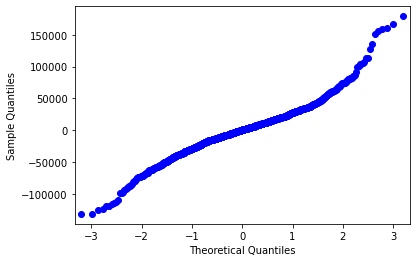

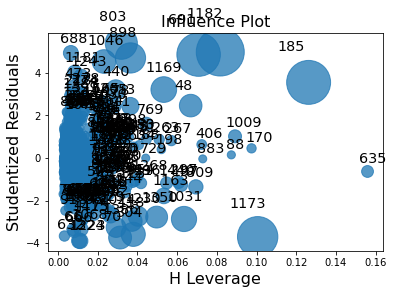

In [122]:
# Plot first linear regression model
# Plot residuals of the regression model in the previous section
# line is diagonal and linear if the regression model is a good fit
import seaborn as sns
import statsmodels
import statsmodels.api as sm
sm.qqplot(res.resid);
plt.show();

# Leverage plot is good for identifying outliers
sm.graphics.influence_plot(res)
plt.show();

EvalQual = 1,2,3


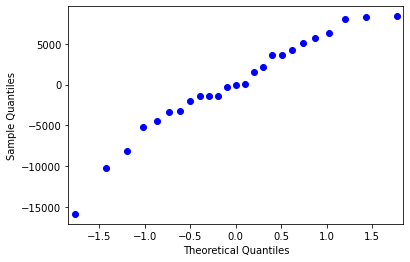

EvalQual = 4,5,6,7,8


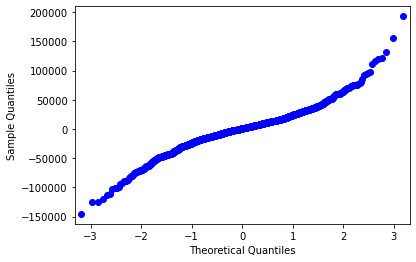

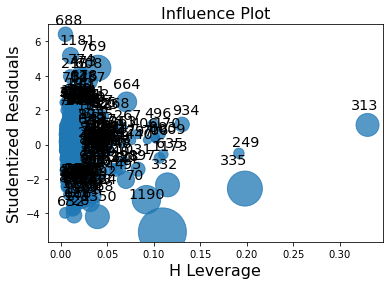

EvalQual = 9,10


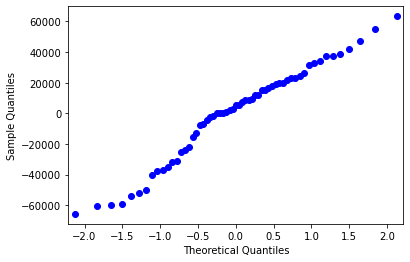

In [126]:
# Plot linear regression model with EvalQual
# Plot residuals of the regression model in the previous section
# line is diagonal and linear if the regression model is a good fit
print('EvalQual = 1,2,3')
sm.qqplot(res1.resid); # EvalQual = 1,2,3
plt.show();

# Leverage plot is good for identifying outliers
# invalid value in square root
#sm.graphics.influence_plot(res1)
#plt.show();

# EvalQual = 4,5,6,7,8
print('EvalQual = 4,5,6,7,8')
sm.qqplot(res4.resid);
plt.show();

# Leverage plot is good for identifying outliers
sm.graphics.influence_plot(res4)
plt.show();

# EvalQual = 9,10
print('EvalQual = 9,10')
sm.qqplot(res9.resid);
plt.show();

# Leverage plot is good for identifying outliers
# invalid value in square root
#sm.graphics.influence_plot(res9)
#plt.show();

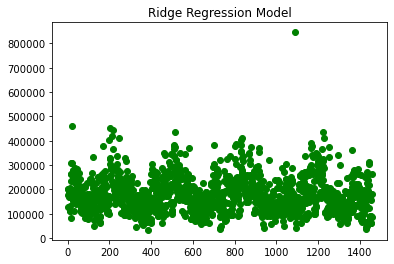

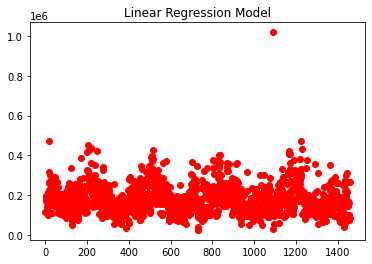

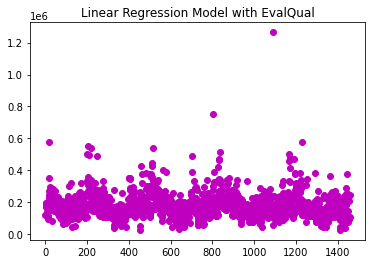

In [136]:
# Scatter plots of predictions against test dataset
plt.plot(y_test, 'go')
plt.title('Ridge Regression Model')
plt.show();

plt.plot(pred, 'ro')
plt.title('Linear Regression Model')
plt.show();

plt.plot(pred2, 'mo')
plt.title('Linear Regression Model with EvalQual')
plt.show();